# import

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [8]:
path = r'/Users/rabito/Desktop/Rabito Docs/Documents/Career Foundry/Specialization'

In [10]:
climate = pd.read_csv(os.path.join(path,'Project ClimateWins','Cleaned Data','weather_scaled.csv'), index_col = 0)

In [12]:
answers = pd.read_csv(os.path.join(path,'1.4 Supervised Learning Algorithms Part 1','Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

# work

In [15]:
climate.shape

(22950, 171)

In [17]:
climate.head()

,id,date,month,basel_cloud_cover,basel_wind_speed,basel_humidity,basel_pressure,basel_global_radiation,basel_precipitation,basel_snow_depth,...,valentia_cloud_cover,valentia_humidity,valentia_pressure,valentia_global_radiation,valentia_precipitation,valentia_snow_depth,valentia_sunshine,valentia_temp_mean,valentia_temp_min,valentia_temp_max
0,0,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,1,19600102,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,2,19600103,1,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,3,19600104,1,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,4,19600105,1,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


#map each iris species number to a name with a dictionary.
iris_class = {0:'Iris-setosa', 1:'Iris-versicolor', 2:'Iris-virginica'}
df_iris['Species'] = [iris_class[i] for i in df_iris.Species]

In [22]:
print(climate.columns.tolist())

['id', 'date', 'month', 'basel_cloud_cover', 'basel_wind_speed', 'basel_humidity', 'basel_pressure', 'basel_global_radiation', 'basel_precipitation', 'basel_snow_depth', 'basel_sunshine', 'basel_temp_mean', 'basel_temp_min', 'basel_temp_max', 'belgrade_cloud_cover', 'belgrade_humidity', 'belgrade_pressure', 'belgrade_global_radiation', 'belgrade_precipitation', 'belgrade_sunshine', 'belgrade_temp_mean', 'belgrade_temp_min', 'belgrade_temp_max', 'budapest_cloud_cover', 'budapest_humidity', 'budapest_pressure', 'budapest_global_radiation', 'budapest_precipitation', 'budapest_sunshine', 'budapest_temp_mean', 'budapest_temp_min', 'budapest_temp_max', 'debilt_cloud_cover', 'debilt_wind_speed', 'debilt_humidity', 'debilt_pressure', 'debilt_global_radiation', 'debilt_precipitation', 'debilt_sunshine', 'debilt_temp_mean', 'debilt_temp_min', 'debilt_temp_max', 'dusseldorf_cloud_cover', 'dusseldorf_wind_speed', 'dusseldorf_humidity', 'dusseldorf_pressure', 'dusseldorf_global_radiation', 'dusseld

In [12]:
climate.drop(['id','date', 'month','roma_cloud_cover', 'roma_wind_speed', 'roma_humidity', 'roma_pressure', 'roma_sunshine', 'roma_temp_mean', 'tours_wind_speed', 'tours_humidity', 'tours_pressure', 'tours_global_radiation', 'tours_precipitation', 'tours_temp_mean', 'tours_temp_min', 'tours_temp_max','gdansk_cloud_cover', 'gdansk_humidity', 'gdansk_precipitation', 'gdansk_snow_depth', 'gdansk_temp_mean', 'gdansk_temp_min', 'gdansk_temp_max'], axis=1)

,basel_cloud_cover,basel_wind_speed,basel_humidity,basel_pressure,basel_global_radiation,basel_precipitation,basel_snow_depth,basel_sunshine,basel_temp_mean,basel_temp_min,...,valentia_cloud_cover,valentia_humidity,valentia_pressure,valentia_global_radiation,valentia_precipitation,valentia_snow_depth,valentia_sunshine,valentia_temp_mean,valentia_temp_min,valentia_temp_max
0,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,-0.528623,-0.845652,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,-0.582946,-0.462450,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,-0.257010,-0.186545,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,-0.555784,-0.385810,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,-1.003946,-1.075573,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,-1.833187,-0.02793,0.284075,1.037367,-0.005632,-0.004619,-0.179228,0.720943,0.747959,0.779123,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22946,0.244897,-0.02793,0.103401,0.976231,-0.005632,-0.004619,-0.179228,0.187388,0.856604,1.223637,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22947,-0.586336,-0.02793,0.013064,0.716402,-0.005632,-0.004619,-0.179228,0.349774,0.856604,1.039701,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22948,-0.170720,-0.02793,0.374412,0.487141,-0.005632,-0.004619,-0.179228,0.280180,0.680055,0.809780,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530


In [24]:
climate = climate[['basel_temp_mean','belgrade_temp_mean',
 'budapest_temp_mean','debilt_temp_mean','dusseldorf_temp_mean',
 'heathrow_temp_mean',
 'kassel_temp_mean',
 'ljubljana_temp_mean',
 'maastricht_temp_mean',
 'madrid_temp_mean',
 'munchenb_temp_mean',
 'oslo_temp_mean',
 'sonnblick_temp_mean',  
 'stockholm_temp_mean',
 'valentia_temp_mean',]].copy()

In [26]:
columns_to_drop = ['DATE']
columns_to_drop = [col for col in columns_to_drop if col in answers.columns]
answers.drop(columns=columns_to_drop, inplace=True)

In [28]:
answers.head()

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
answers.columns = answers.columns.str.lower()

In [32]:
climate.head()

,basel_temp_mean,belgrade_temp_mean,budapest_temp_mean,debilt_temp_mean,dusseldorf_temp_mean,heathrow_temp_mean,kassel_temp_mean,ljubljana_temp_mean,maastricht_temp_mean,madrid_temp_mean,munchenb_temp_mean,oslo_temp_mean,sonnblick_temp_mean,stockholm_temp_mean,valentia_temp_mean
0,-0.528623,-1.016876,-1.099163,-0.114356,-0.105836,-0.106469,-0.182904,-1.370824,-0.097084,-0.988280,-0.265742,-0.186575,-0.124331,-0.391072,-0.668215
1,-0.582946,-1.107669,-1.110927,-0.367511,-0.370915,-0.892676,-0.212437,-1.043881,-0.232112,-0.691740,-0.353714,-0.368598,-0.650834,-0.415953,-0.548046
2,-0.257010,-1.084971,-1.063873,-0.509912,-0.532908,-0.490837,-0.389635,-0.741156,-0.487164,-0.853490,-0.403983,-0.550620,-0.650834,-0.615003,-0.067372
3,-0.555784,-1.209812,-1.146217,-0.525734,-0.577088,-0.316124,-0.493001,-0.910682,-0.472161,-0.624345,-0.642763,-0.417137,-0.943336,-0.764290,-0.998679
4,-1.003946,-1.209812,-1.087400,-0.320045,-0.444548,-0.403481,-0.552067,-0.862246,-0.307127,-0.381721,-0.906678,-0.332193,-0.621584,-0.503037,-1.509396


In [34]:
X = climate
y = answers

In [36]:
print(X.shape)
print(y.shape)

(22950, 15)
(22950, 15)


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [40]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 15)
(5738, 15)
(17212, 15)
(5738, 15)


In [42]:
X_train[:10]

,basel_temp_mean,belgrade_temp_mean,budapest_temp_mean,debilt_temp_mean,dusseldorf_temp_mean,heathrow_temp_mean,kassel_temp_mean,ljubljana_temp_mean,maastricht_temp_mean,madrid_temp_mean,munchenb_temp_mean,oslo_temp_mean,sonnblick_temp_mean,stockholm_temp_mean,valentia_temp_mean
8196,1.359088,1.116763,1.265281,0.993200,1.190107,0.802037,1.175617,1.026758,1.133166,1.330123,1.267478,0.492977,1.074927,0.143873,1.464779
20472,-1.655817,-1.845364,-1.769677,-1.981379,-2.108658,-1.731297,-0.005705,-1.830966,-2.092490,-1.230904,-1.736125,-2.140286,-1.806216,-1.771976,-0.007287
18269,-1.655817,-1.073622,-1.428538,-2.361113,-2.373737,-2.447619,-2.264984,-1.225516,-2.437560,-1.729630,-1.434508,-2.528601,-1.323588,-1.946144,-2.921377
7713,-1.601495,-1.357351,-1.205034,-1.554179,-1.681585,-1.539113,-1.777689,-1.346606,-1.672405,-1.702672,-1.660721,-1.569948,-2.318095,-1.187269,-1.178932
21958,-0.582946,-0.676402,-0.652154,-0.683956,-0.842167,-0.700492,-0.005705,-0.498976,-0.637194,-0.529991,-0.479388,-0.708373,-1.411339,-0.789171,-0.007287
11464,1.073894,0.685496,0.818272,0.328667,0.424323,0.941807,0.629256,1.014649,0.563050,0.521378,1.166939,0.602191,0.358298,0.330481,0.713725
3984,-0.908881,-0.937432,-0.828605,-0.763067,-0.562362,-0.141411,-0.935997,-1.128644,-0.472161,-0.233451,-1.384239,-1.036014,0.358298,-0.776730,0.052797
4752,-1.941011,-1.380049,-1.134453,-1.221912,-1.239786,-0.420952,-1.349460,-1.201298,-1.042277,-1.136550,-1.396806,-0.829722,-0.767835,-0.751849,-0.067372
11092,0.720797,0.980574,1.041776,0.550178,0.777762,1.064106,0.688322,0.917777,0.698077,0.575294,0.689378,0.772079,0.636174,0.566852,0.563514
21377,1.141798,1.241604,1.159410,1.420401,1.425733,1.431003,-0.005705,1.075195,1.523245,1.599705,1.154371,1.827811,1.382054,1.574539,-0.007287


In [51]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc[:10])

[[ 1.35262702  1.11408523  1.26048221  0.98510239  1.18267178  0.79366897
   1.16696642  1.02406684  1.12530567  1.32713725  1.26235516  0.49003378
   1.0719053   0.14041372  1.45475014]
 [-1.65254457 -1.84706463 -1.77256635 -1.98055572 -2.10946465 -1.72667839
  -0.01359355 -1.83095876 -2.09029531 -1.23266439 -1.73566519 -2.14158559
  -1.80450767 -1.77299837 -0.0139084 ]
 [-1.65254457 -1.07557731 -1.43164228 -2.35915038 -2.37401133 -2.43932834
  -2.27141449 -1.22608045 -2.43428984 -1.73115208 -1.43460876 -2.5296585
  -1.322672   -1.94694492 -2.92125284]
 [-1.59839734 -1.35921235 -1.20827824 -1.55463674 -1.68325056 -1.53547963
  -1.78443351 -1.34705611 -1.67151937 -1.7042068  -1.66040109 -1.57160352
  -2.31554551 -1.18903494 -1.1828407 ]
 [-0.58313666 -0.67848825 -0.65574614 -0.68702399 -0.84551941 -0.70115774
  -0.01359355 -0.50022649 -0.6395358  -0.5320871  -0.48126337 -0.71056677
  -1.41027848 -0.79144282 -0.0139084 ]
 [ 1.06835403  0.68295996  0.81375413  0.32256175  0.41842582  0.9

In [54]:
X_train_df = pd.DataFrame(X_train_sc, index=X_train.index, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_sc, index=X_test.index, columns=X_test.columns)

In [57]:
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001)
mlp.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500)

In [60]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.4423076923076923
0.44614848379226213


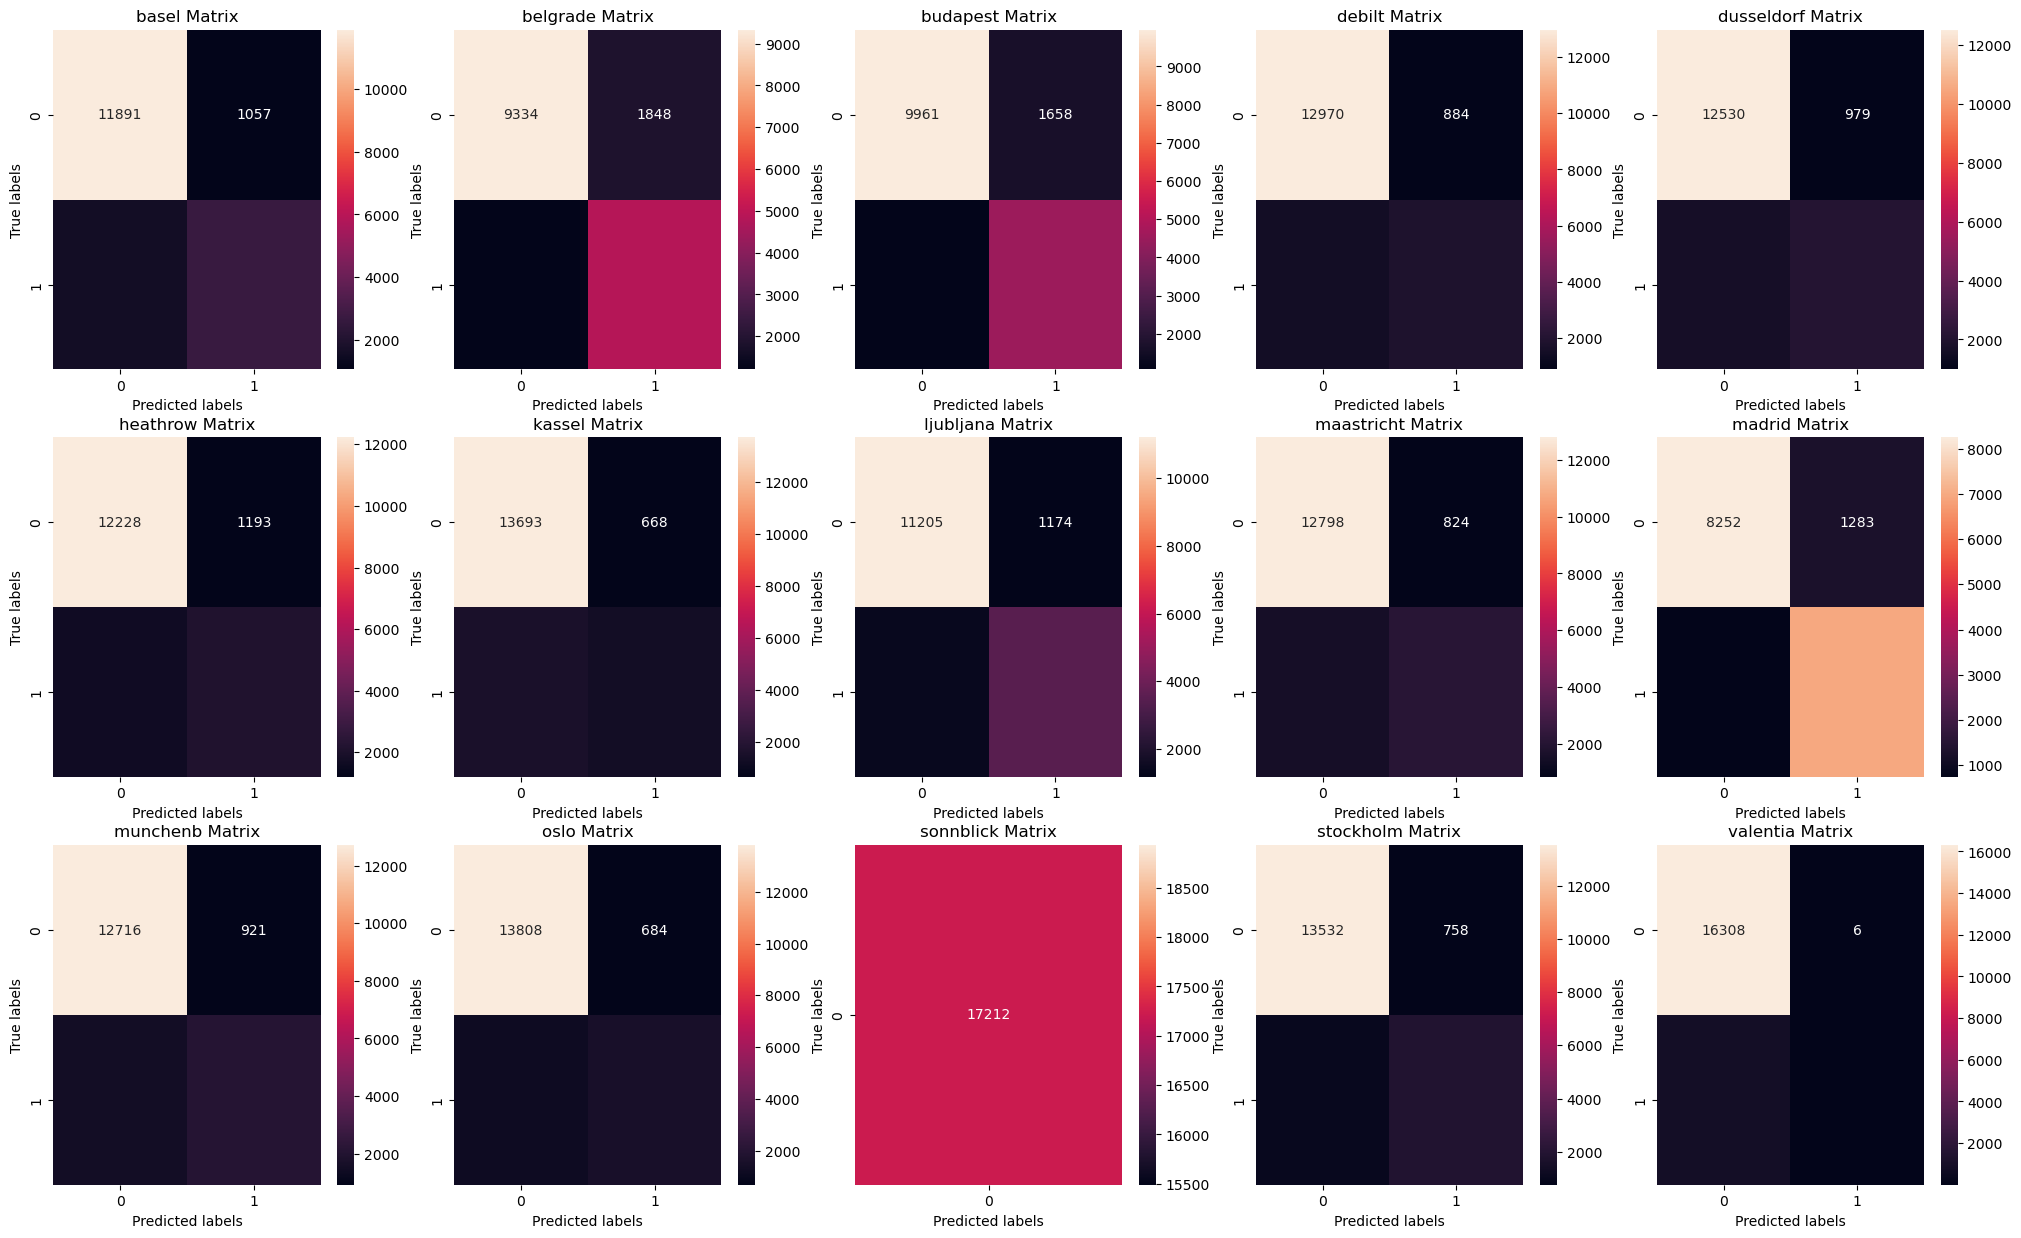

In [67]:
#Confusion matrix based on the last "k" in the sequence (Training data)
locations = list({x.split("_")[0] for x in climate.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        count+=1

In [70]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500, tol=0.0001)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500)

In [73]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.44585173135022077
0.4513767863367027


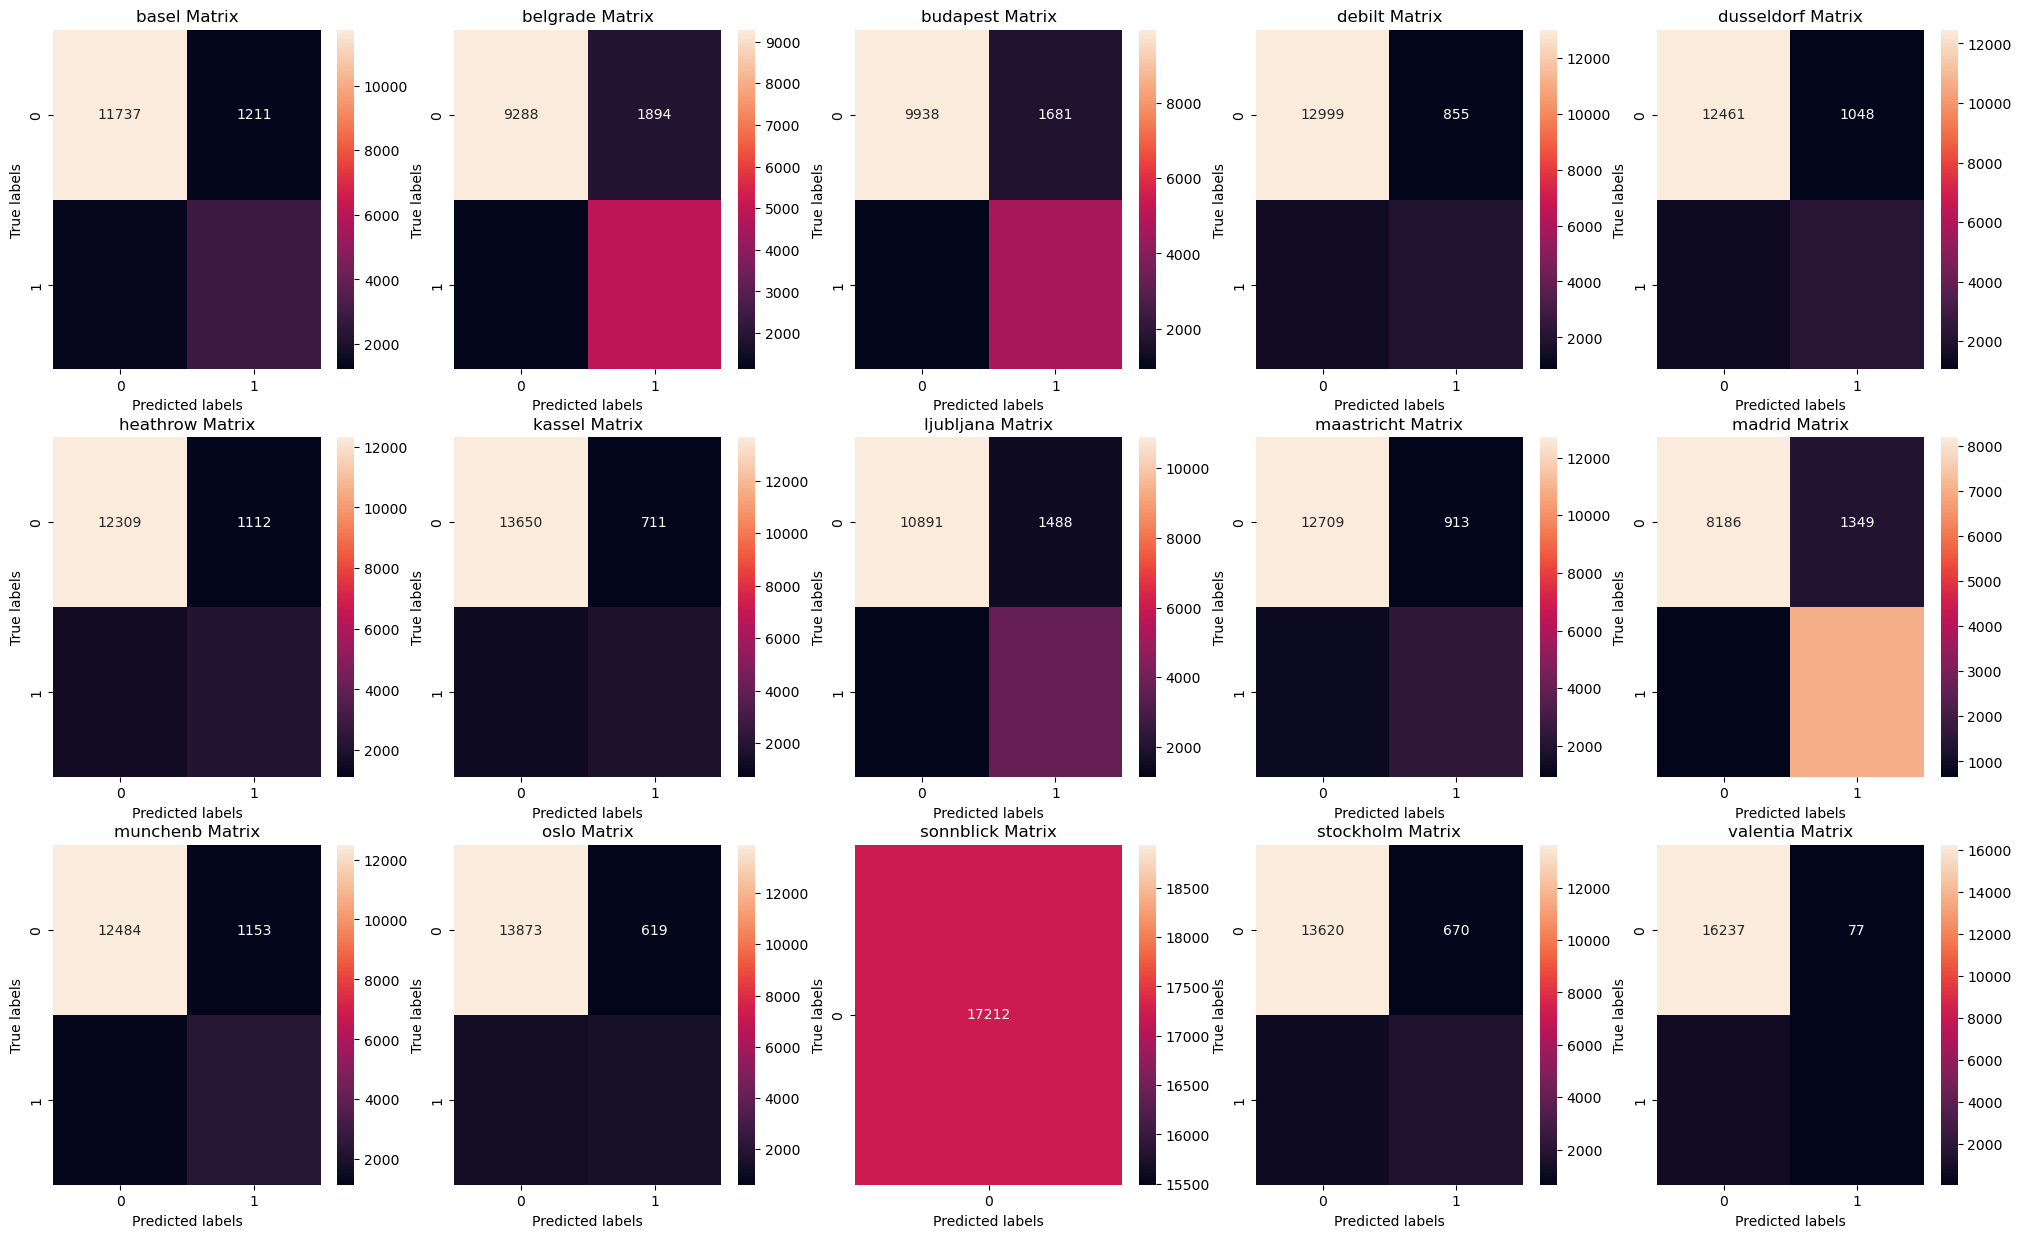

In [76]:
#Confusion matrix based on the last "k" in the sequence (Training data)
locations = list({x.split("_")[0] for x in climate.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        count+=1

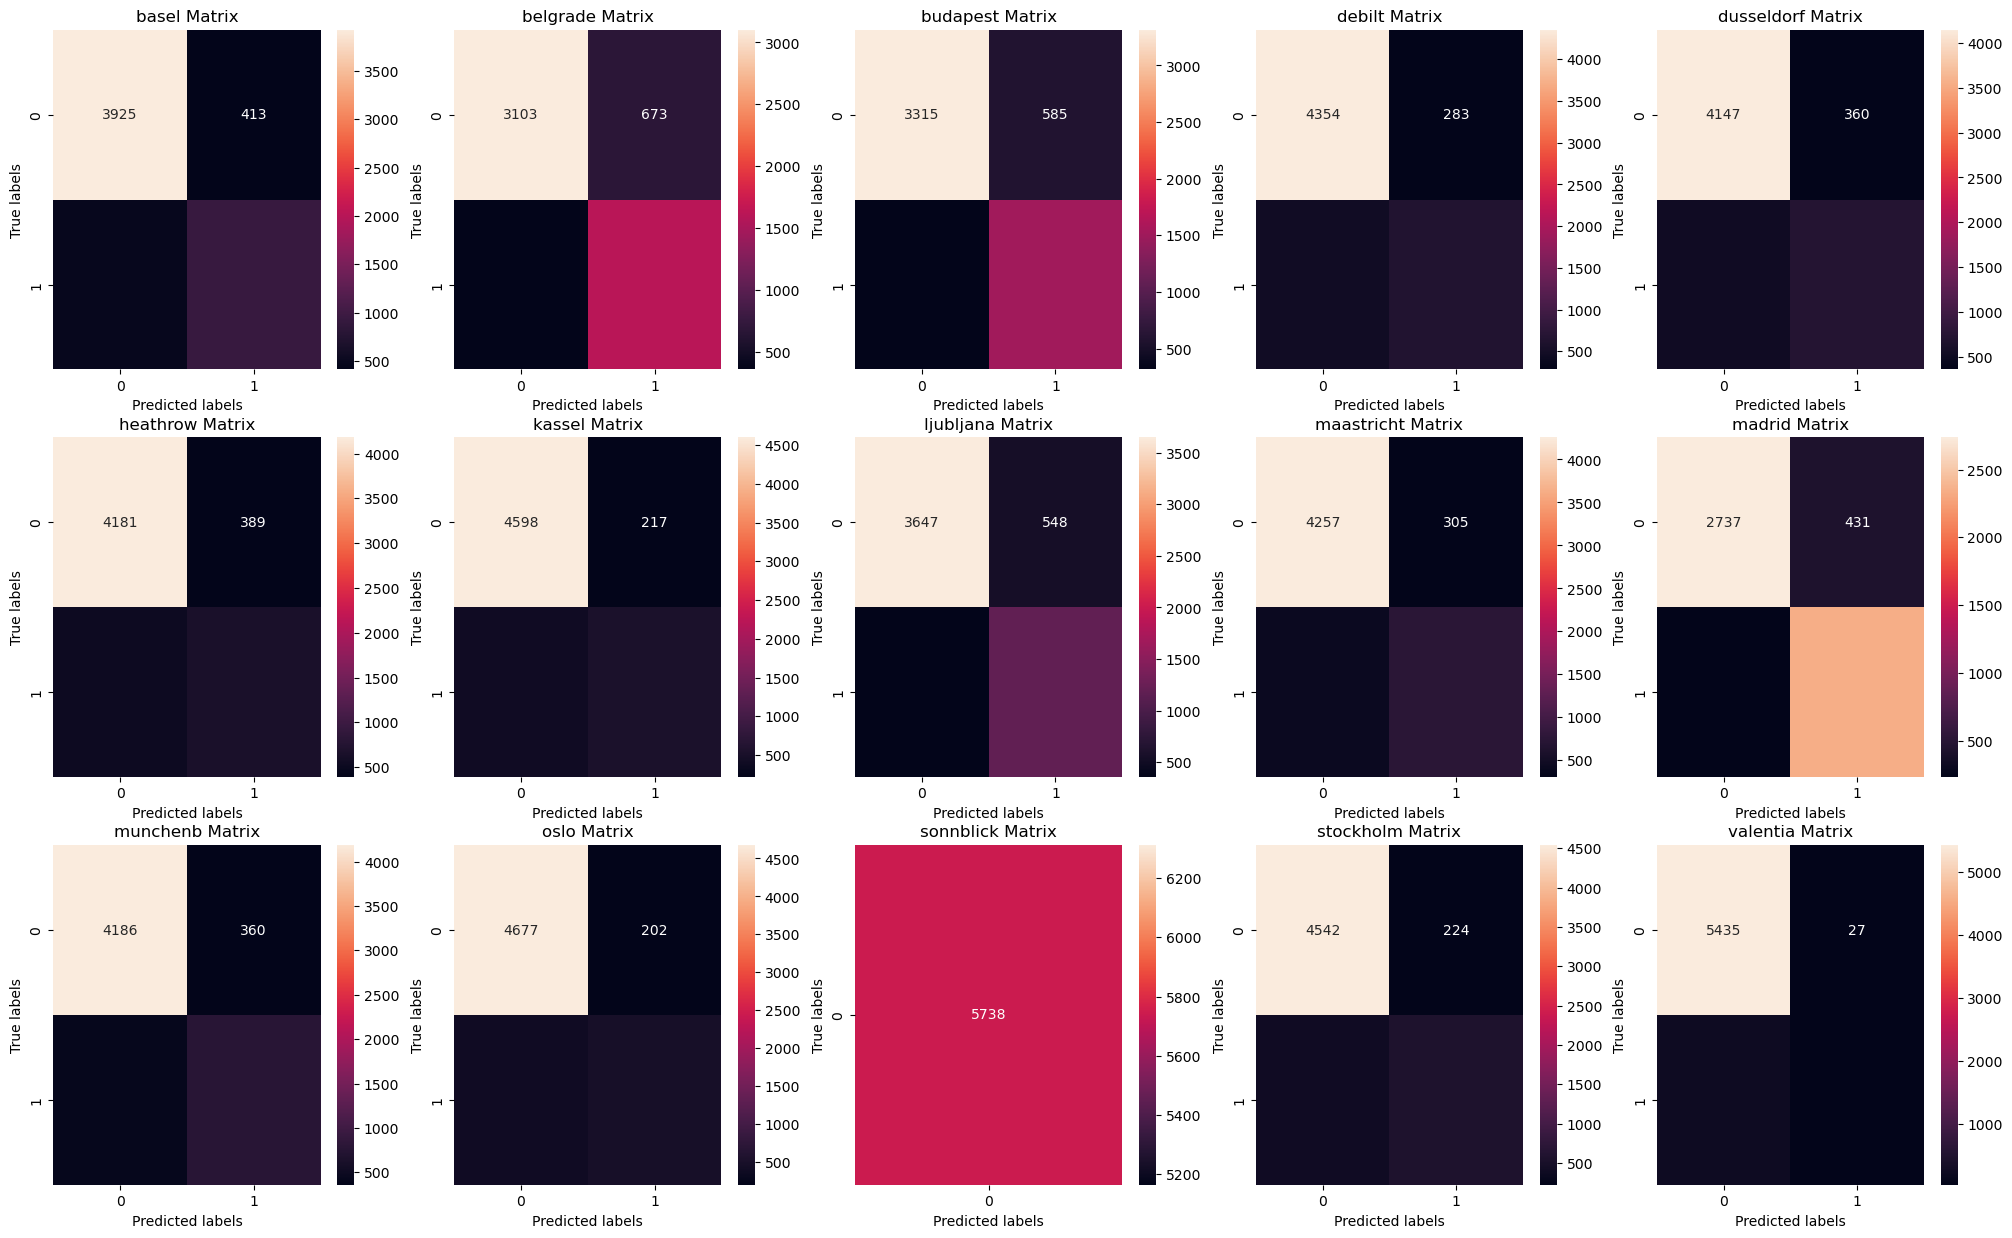

In [82]:
#Confusion matrix based on the last "k" in the sequence (Testing data)
locations = list({x.split("_")[0] for x in climate.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        count+=1

In [85]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 50, 60), max_iter=1000, tol=0.0001)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 50, 60), max_iter=1000)

In [87]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.4612479665349756
0.4581735796444754


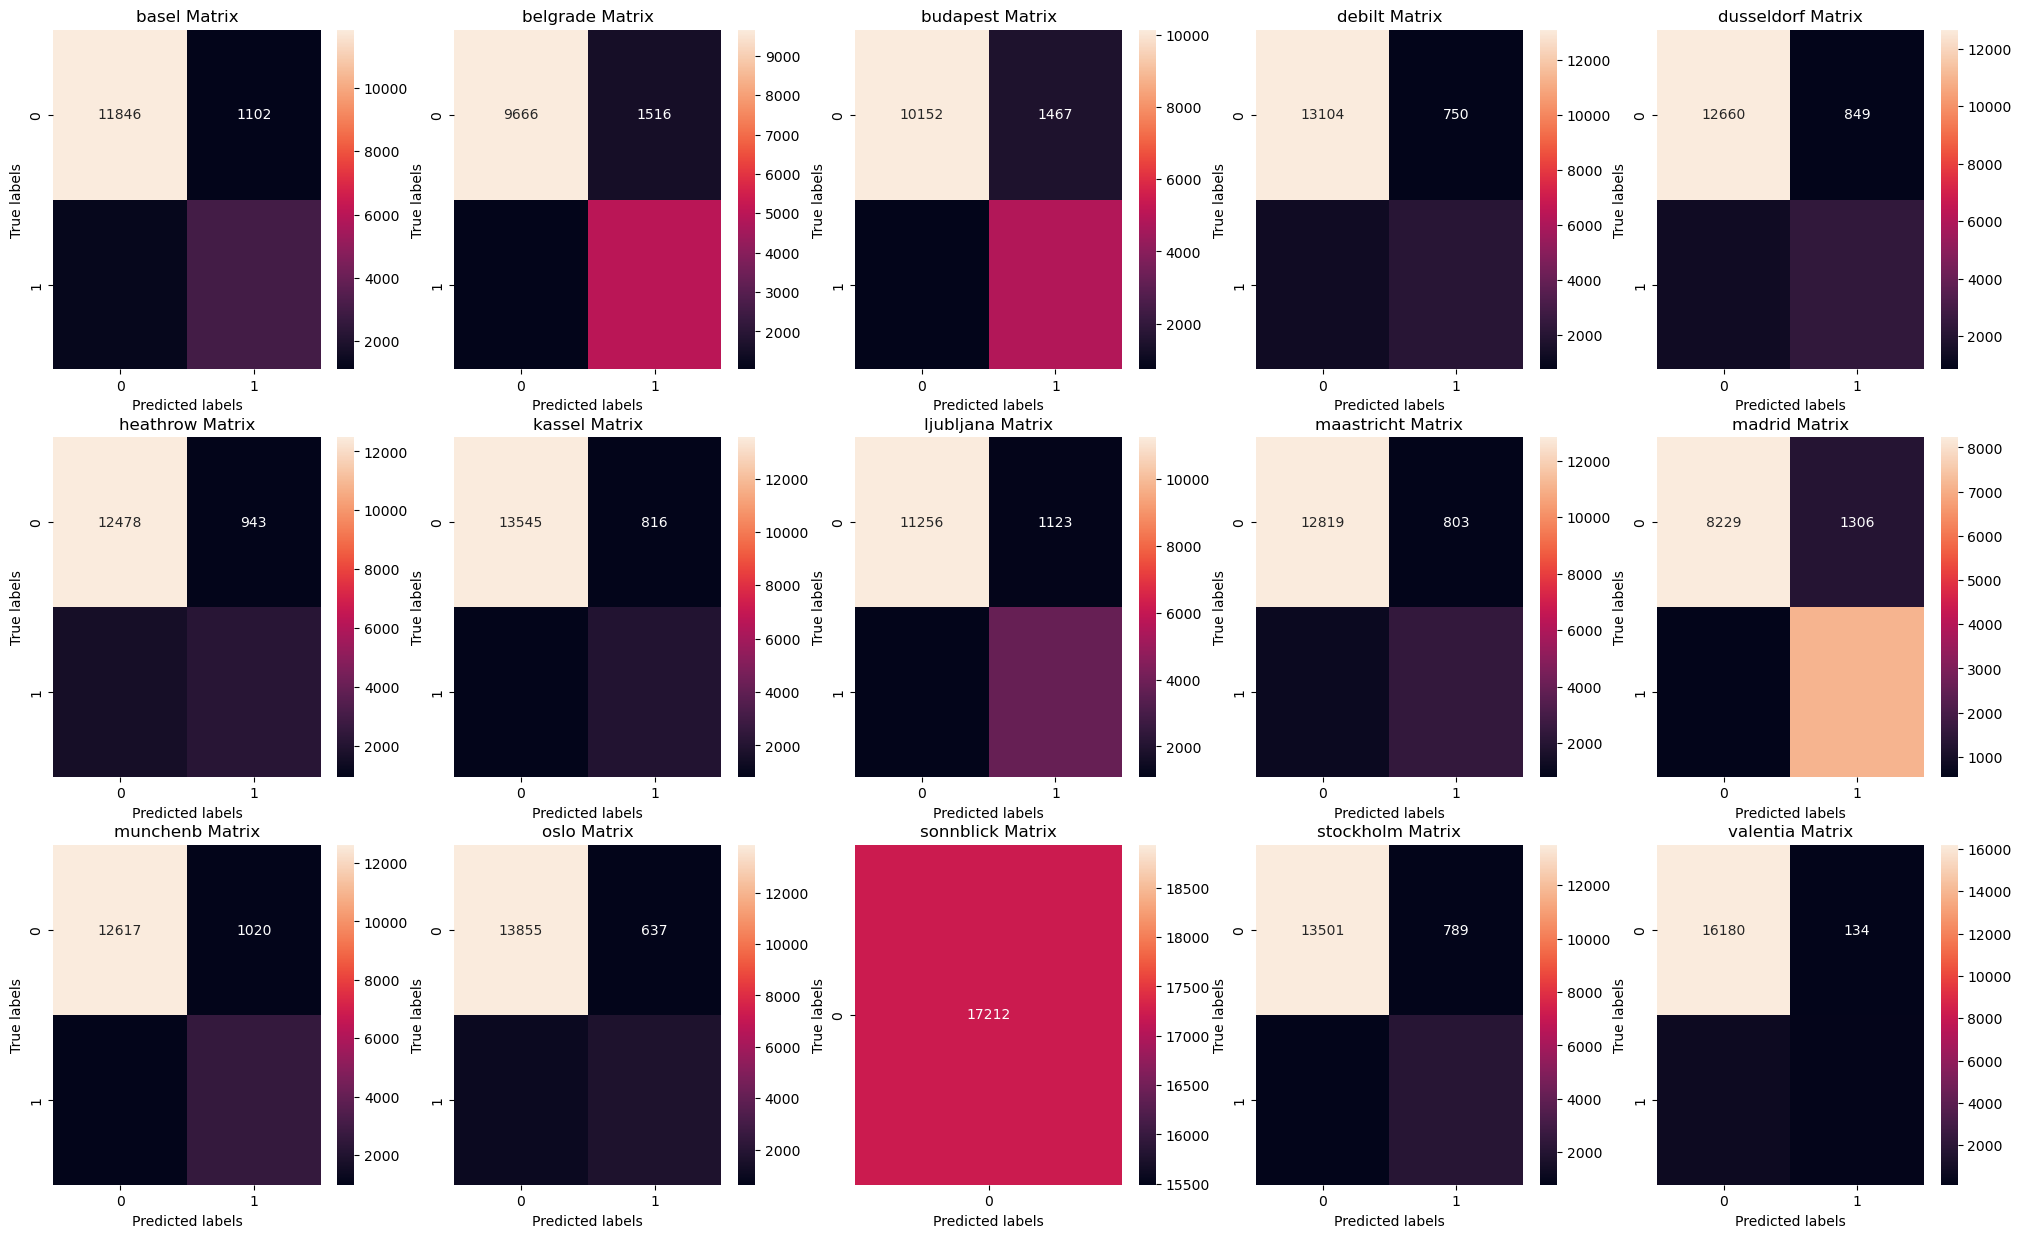

In [90]:
#Confusion matrix based on the last "k" in the sequence (Training data)
locations = list({x.split("_")[0] for x in climate.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        count+=1

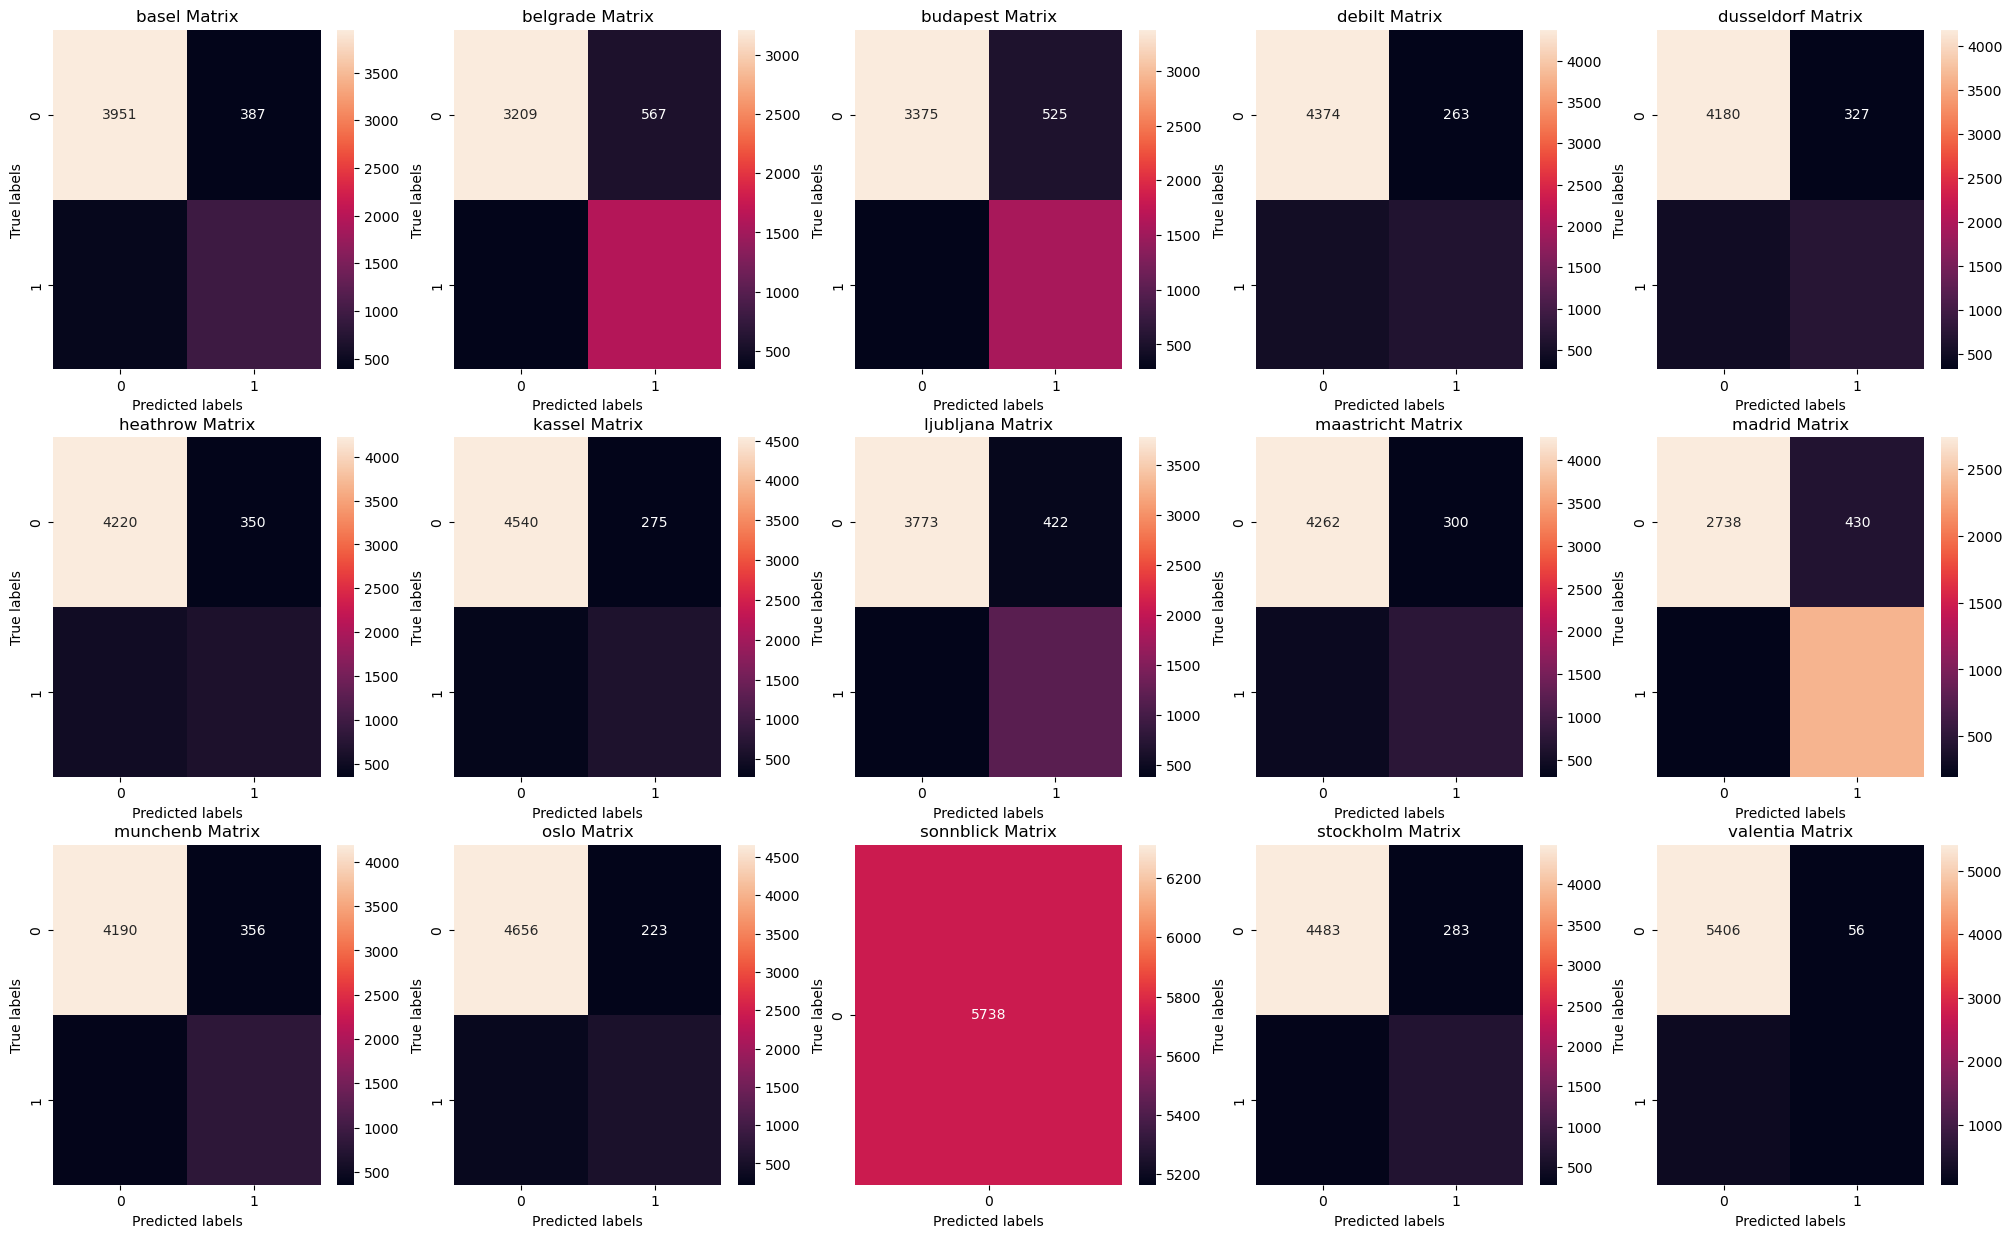

In [92]:
#Confusion matrix based on the last "k" in the sequence (Testing data)
locations = list({x.split("_")[0] for x in climate.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        count+=1

In [95]:
mlp = MLPClassifier(hidden_layer_sizes=(70, 60, 60), max_iter=1000, tol=0.0003)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(70, 60, 60), max_iter=1000, tol=0.0003)

In [97]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.48477806181733674
0.45120250958522135


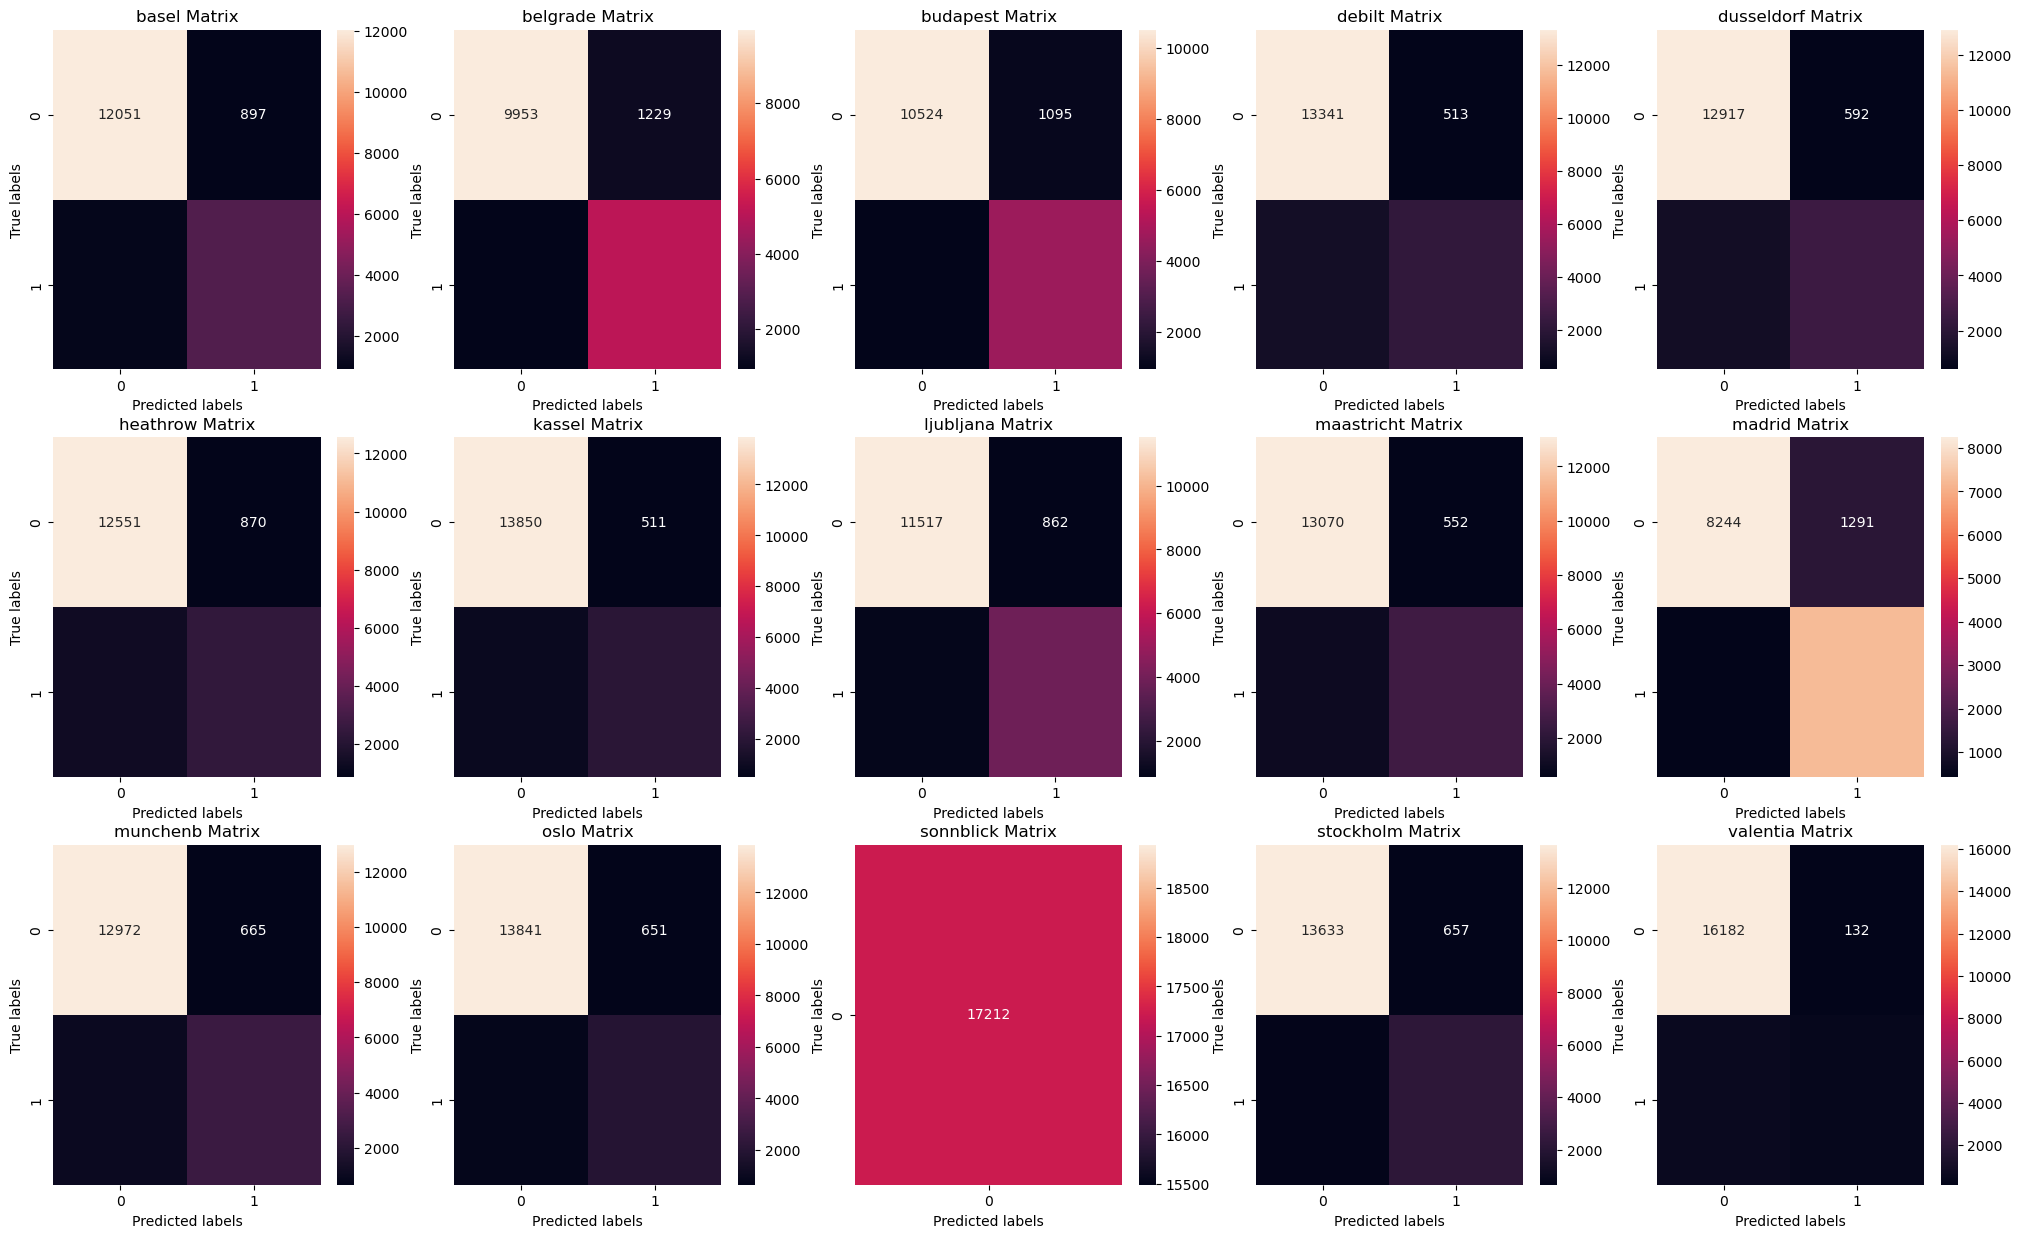

In [101]:
#Confusion matrix based on the last "k" in the sequence (Training data)
locations = list({x.split("_")[0] for x in climate.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        count+=1

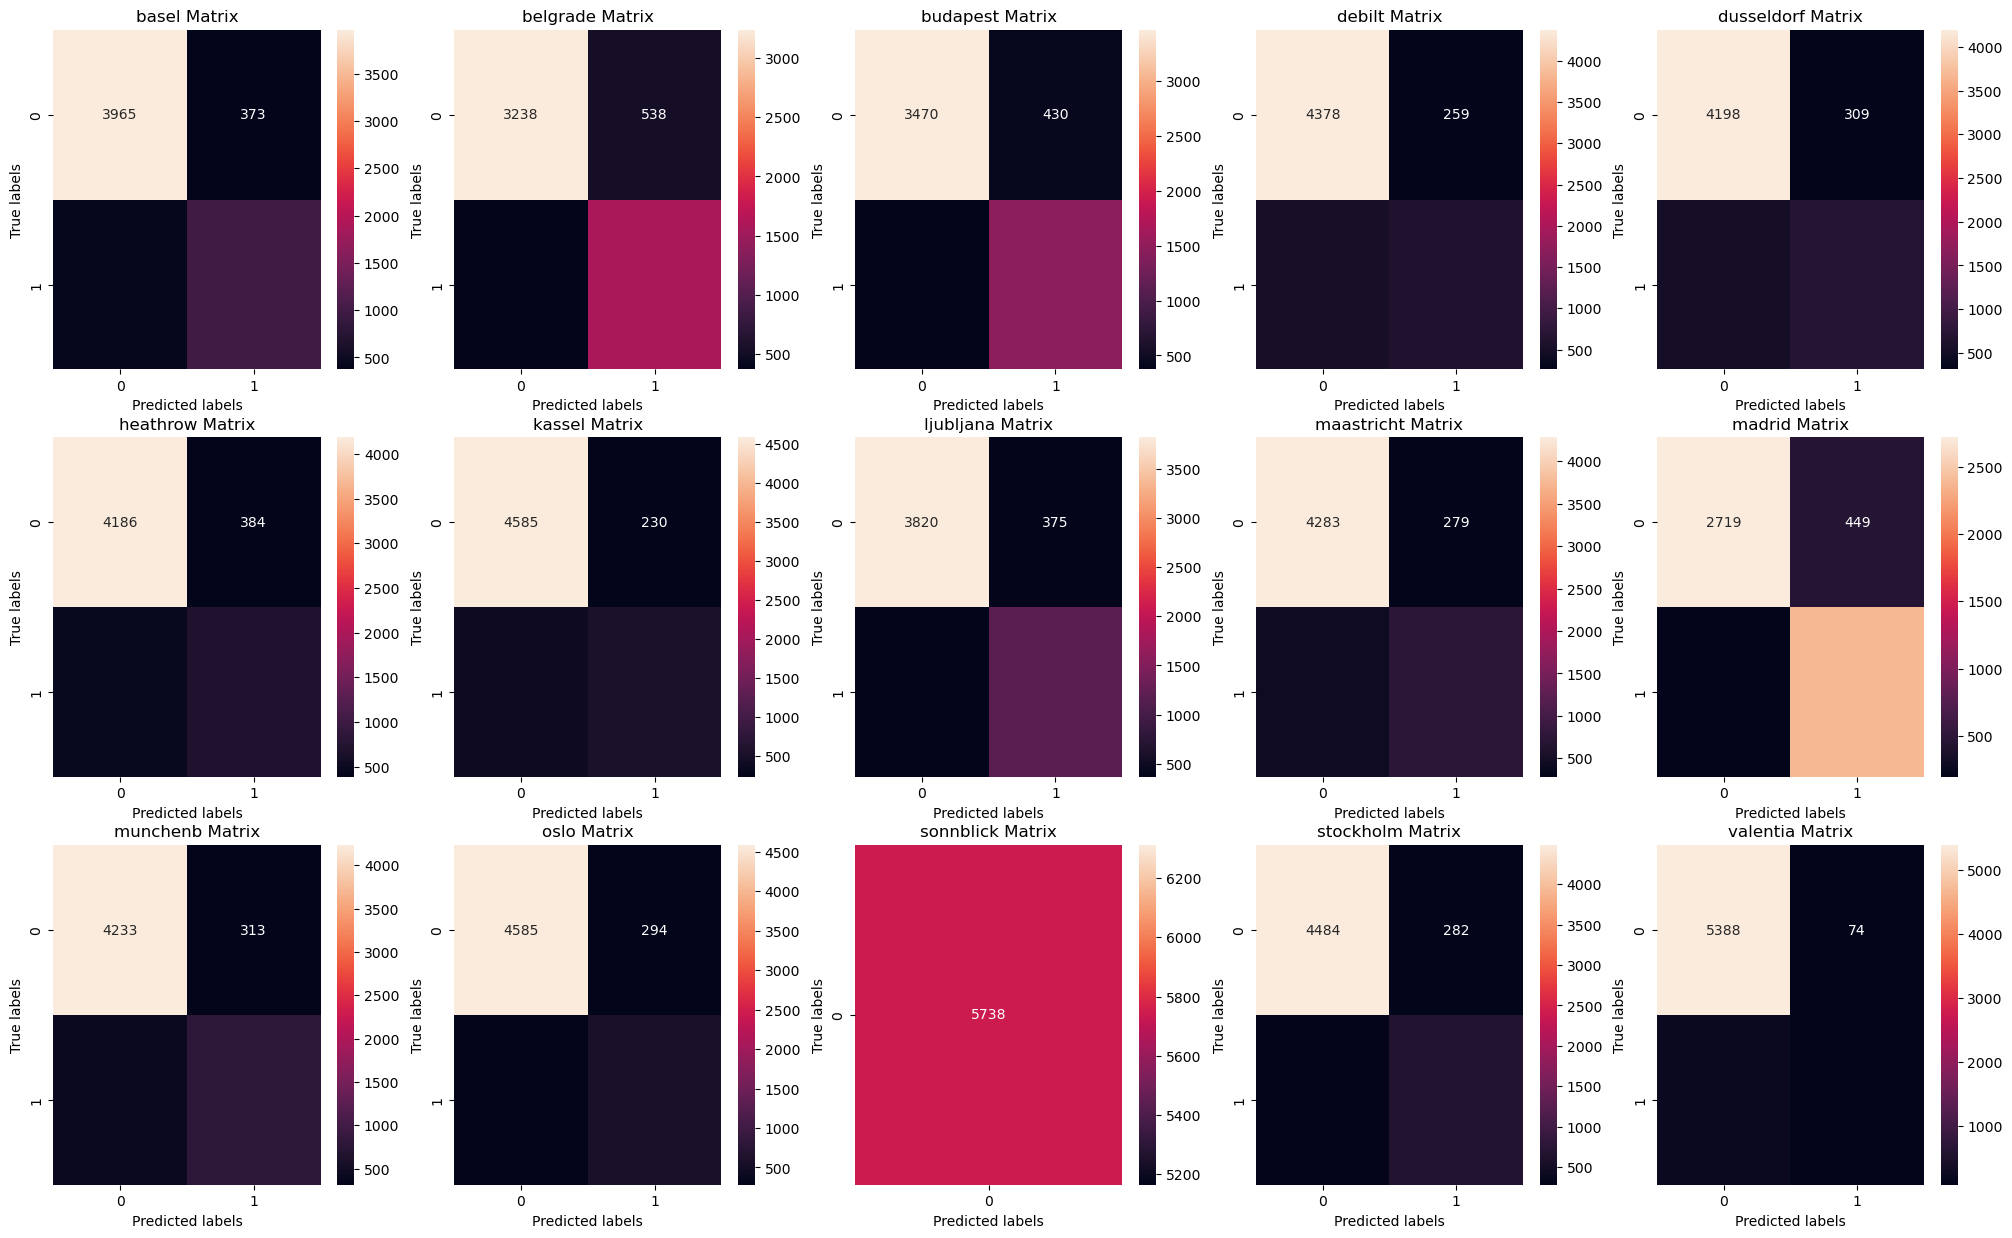

In [104]:
#Confusion matrix based on the last "k" in the sequence (Testing data)
locations = list({x.split("_")[0] for x in climate.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        count+=1